# Image Registration of Scanned Images on World Map

 <h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
        <li><span><a href="#Pre-requisites" data-toc-modified-id="Pre-requisites-2">Pre-requisites</a></span></li>
        <li><span><a href="#Data-used" data-toc-modified-id="Data used-3">Data used</a></span></li>
        <li><span><a href="#Define-the-constants" data-toc-modified-id="Define the constants-4">Define the constants</a></span></li>
        <li><span><a href="#Import-Necessary-Packages" data-toc-modified-id="Import Necessary Packages-5">Import Necessary Packages</a></span></li>
        <li><span><a href="#Create-species-region-mask" data-toc-modified-id="Create species region mask-6">Create species region mask</a></span></li>
        <li><span><a href="#Pre-process-images" data-toc-modified-id="Pre-process images-7">Pre-process images</a></span></li>
        <li><span><a href="#Define-math-functions" data-toc-modified-id="Define math functions-8">Define image write functions</a></span></li>
        <li><span><a href="#Define-helper-functions" data-toc-modified-id="Define helper functions-9">Define math functions</a></span></li>
        <li><span><a href="#Define-annotation-functions" data-toc-modified-id="Define annotation functions-10">Define annotation functions</a></span></li>
        <li><span><a href="#Define-core-algorithm-functions" data-toc-modified-id="Define core algorithm functions-11">Define core algorithm functions</a></span></li>
        <li><span><a href="#Run-the-image-registration-pipeline" data-toc-modified-id="Run the image registration pipeline-12">Run the image registration pipeline</a></span></li>
        <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12">Conclusion</a></span></li>
    </ul>
</div>

## Introduction

The sample code uses Computer Vision techniques to automatically register scanned images of any part of the world onto the world map and hence overlay the species hotspots depicted in the scanned images onto the world map.

### What is the Half Earth Project all about?
The Half Earth Project advocates the conservation of half of the Earth in order to combat species extinction crisis and preserve Mother Earth for the generations to come.

### How to identify which half of the Earth to conserve ?
One visual approach is to map global species distribution and use this information to identify the regions rich in biodiversity. However, mapping thousands of species all across the globe requires a lot of “manual” work to do. This sample demonstrates how the mapping process can be automated by using Computer Vision techniques. The expected inputs and final output are shown below:

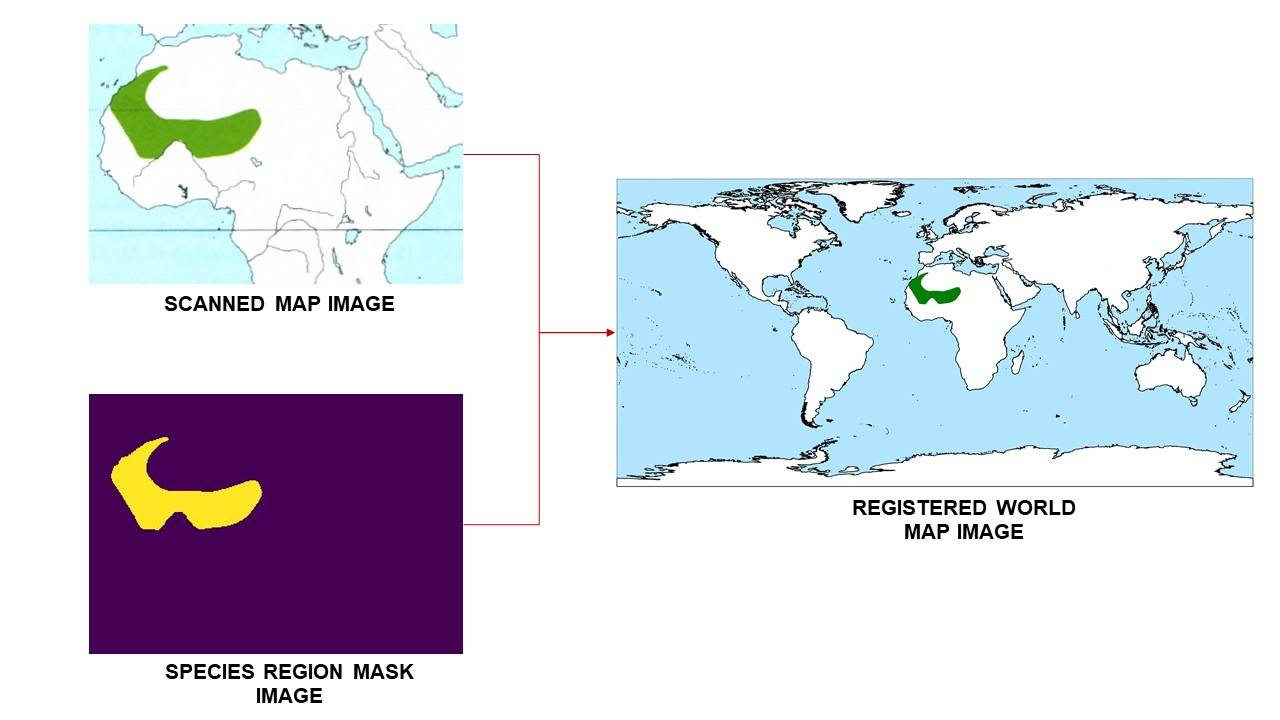

## Pre-requisites
This sample requires installation of Python 3.6, OpenCV, ArcGIS API for Python, Numpy, copy, imutils, pandas, datetime. Kindly install the dependencies using the following commands:

pip install opencv-contrib-python==4.2.0.34 \
pip install arcgis \
pip install imutils \
pip install copy \
pip install numpy \
pip install pandas \
pip install datetime

## Data used
The data used for this sample are the scanned images from a map notebook and the corresponding species region masks. Please click here for downloading sample data. Sample inputs are shown below:

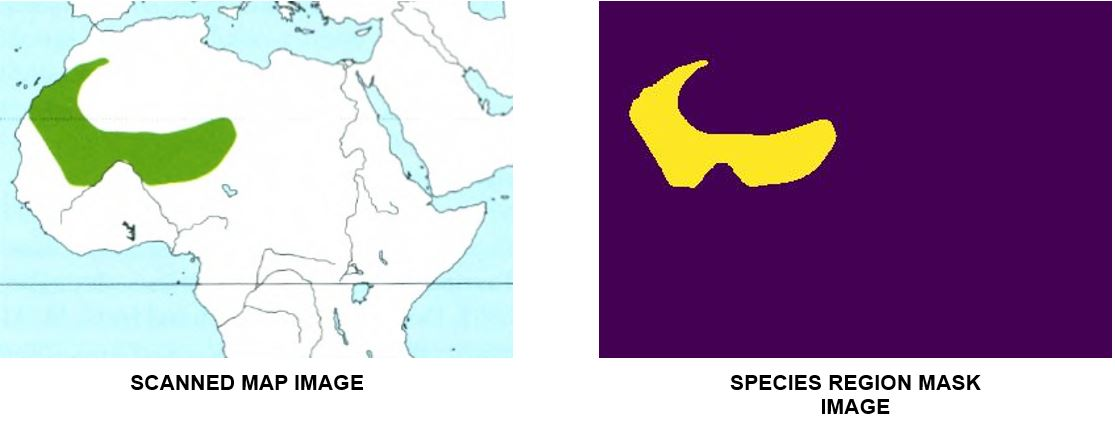

## Define the constants
The following constants need to be defined before running the sample. The values need to be tweaked based on the type/quality of input. The results of the notebook will vary based on the values provided.

In [48]:
# Path to the folder where the scanned map images are placed
IMAGES_TO_REGISTER_FOLDER = r"C:\Users\ati11038\Documents\workspace\data" \
                            r"\half_earth\extracted_samples\extracted_maps_2"

# Path to the folder where the species region mask images are placed
IMAGES_TO_REGISTER_SPECIES_MASKS_FOLDER = r"C:\Users\ati11038\Documents" \
                                         r"\workspace\data\half_earth\extracted_samples" \
                                          r"\extracted_masks_2"

# File path and filename of world image file 
WORLD_MAP_IMAGE_PATH = r"C:\Users\ati11038\Documents\workspace\data\half_earth\world_map"
WORLD_MAP_IMAGE_NAME = "map_without_rivers.tif"

# Path to the folder where the outputs need to appear
RESULTS_FOLDER = r"C:\\Users\\ati11038\\Documents\\workspace\\data\\half_earth\\results\\main" \
                 r"\\4_5_2020\\2"

# Pre-process kernel size
# (int: 1-9)
PREPROCESS_KERNEL_SIZE = 5

# Padded world map image margins
# (int: 100-500)
WORLD_MAP_IMAGE_PADDING_X = 300
WORLD_MAP_IMAGE_PADDING_Y = 150

# Minimum expected IOU of homography transform result with reference homography
# to qualify as improved homography
# (float: 0.0 - 1.0)
IOU_THRESHOLD_HOMOGRAPHY = 0.60

# Minimum expected Area Ratio Threshold for checking filtered control points distribution
# (float: 0.0 - 1.0)
CONTROL_POINTS_AREA_RATIO_THRESHOLD = 0.40

# Minimum expected spread of estimated control points over the scanned image
# (float: 0.0 - 1.0)
CONTOUR_RECT_AREA_RATIO_THRESHOLD = 0.40

# Division factor w.r.t diagonal of template for estimating size of contour patch
# (int: 8 - 12)
CONTOUR_PATCH_SIZE_FACTOR = 8

# Maximum allowed non zero pixels in contour patch to be selected for matching
# (float: 0.0 - 1.0)
CONTOUR_PATCH_NON_ZERO_THRESHOLD = 0.6

# Maximum allowed non zero pixels in world map patch to be selected for matching
# (float: 0.0 - 1.0)
WORLD_MAP_PATCH_NON_ZERO_THRESHOLD = 0.6

# Multiplication factor w.r.t contour patch for estimating size of world map patch
# (float: 1.0 - 5.0)
WORLD_MAP_PATCH_SIZE_FACTOR = 2.5

# Maximum allowed distance of control points from the nearest contour point
# for control point refinement
# (int: 1 - 10) 
REFINEMENT_DISTANCE_THRESHOLD = 5

# Minimum threshold for segmenting mask from species region mask image
# (int: 1 - 255)
SPECIES_REGION_MASK_THRESHOLD = 50
SPECIES_REGION_MASK_VALUE = 255

# Upper and lower thresholds for homogenizing query image
# (int: 1 - 255)
HOMOGENIZE_UPPER_THRESHOLD = 245

# Boundary values for latitude and longitude corresponding to world map image
LONGITUDE_EXTREME_LEFT = -180
LATITUDE_EXTREME_TOP = 85
LONGITUDE_EXTREME_RIGHT = 180
LATITUDE_EXTREME_BOTTOM = -85

# Enable writing outputs to disk
ENABLE_OUTPUT_WRITE = True

# Add Timestamp as filename prefix
ENABLE_TIMESTAMP = True

# Specify world map size
WORLD_MAP_HEIGHT = 1875
WORLD_MAP_WIDTH = 3841

# Enable writing shapefile output
WRITE_SHAPEFILE = True

# Enable writing shapefile output for all species regions
COMBINE_SHAPEFILES = True

# Color for water in world map created using shapefile
COLOR_WATER_BLUE_VALUE = 230
COLOR_WATER_GREEN_VALUE = 216
COLOR_WATER_RED_VALUE = 173

# Enable display of results
SHOW_RESULTS = True

# Global constant variables
DEGREE_PER_PIXEL_X = (LONGITUDE_EXTREME_RIGHT - LONGITUDE_EXTREME_LEFT) / \
                     WORLD_MAP_WIDTH

DEGREE_PER_PIXEL_Y = (LATITUDE_EXTREME_BOTTOM - LATITUDE_EXTREME_TOP) / \
                     WORLD_MAP_HEIGHT

## Import Necessary Packages
The packages defined below are used throughout the notebook.

In [49]:
import cv2
import imutils
import math
import copy
import numpy as np
import os
import arcgis

## Create species region mask

The following function creates a binary region mask using the species region mask image. The region depicted by the white area is mapped on the world map. The threshold value can be adjusted using the constant **SPECIES_REGION_MASK_THRESHOLD**. The expected output is shown below:

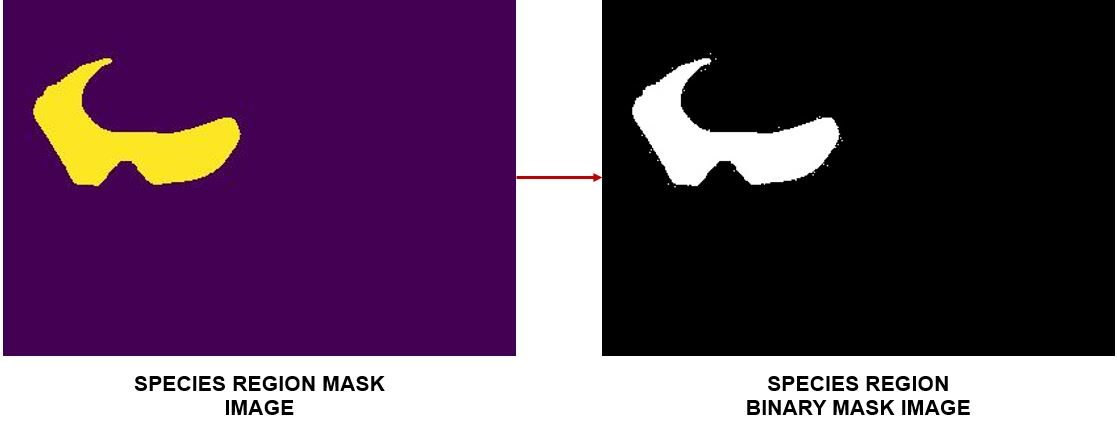

In [50]:
def create_region_mask(mask_img):
    """
    Create binary mask for species region using the original color species region image

    :param mask_img: Color image of species mask
    
    :returns: 
        mask_img: Mask representing species region
    """

    mask_img_gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
    ret, mask_img = cv2.threshold(mask_img_gray,
                                  SPECIES_REGION_MASK_THRESHOLD,
                                  SPECIES_REGION_MASK_VALUE,
                                  cv2.THRESH_BINARY)
    
    return mask_img


## Pre-process images
The following functions are used for image processing tasks such as filling extraneous features in a binary image and filling specific regions of the image. For best results, the images need to be of good quality (with clear edges). 

The following function fills the species region in the scanned map image. The expected input and output are shown below:

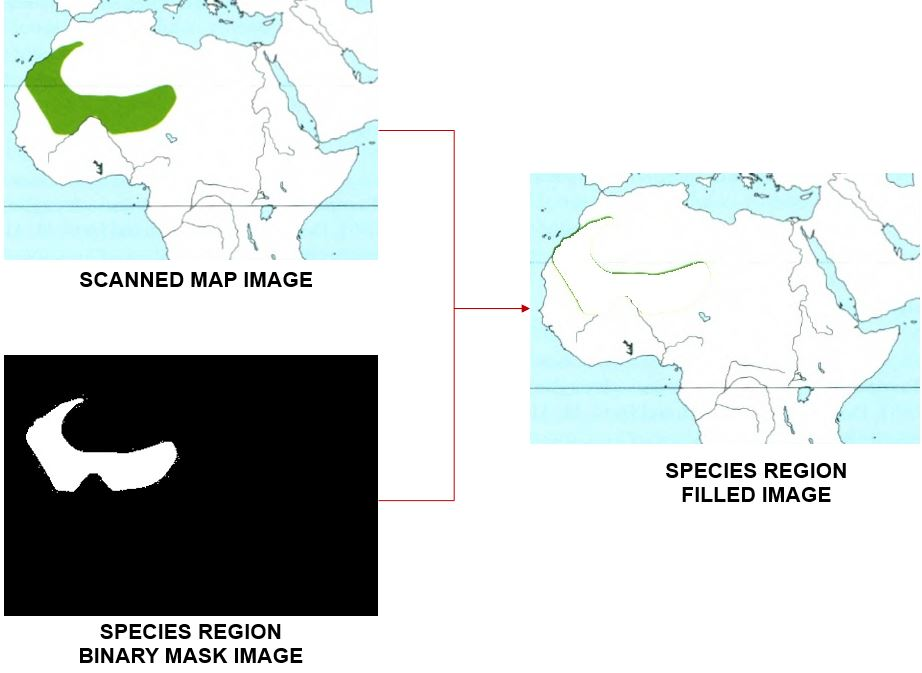

In [51]:
def fill_mask_pixels(input_img, mask):
    """
    Fills the mask pixels of image with white

    :param input_img: Color map image with species region
    :param mask: Binary mask image of species region
    
    :returns: 
        input_img_copy: Filled color image
    """

    input_img_copy = input_img.copy()

    mask_height = mask.shape[0]
    mask_width = mask.shape[1]

    for y in range(0, mask_height):
        for x in range(0, mask_width):
            if mask[y][x] == 255:
                input_img_copy[y][x][0] = 255
                input_img_copy[y][x][1] = 255
                input_img_copy[y][x][2] = 255

    return input_img_copy


The following function fills inconsistent features such as rivers, state boundaries etc. to create a unified landmass image. The expected output of this function is shown below:

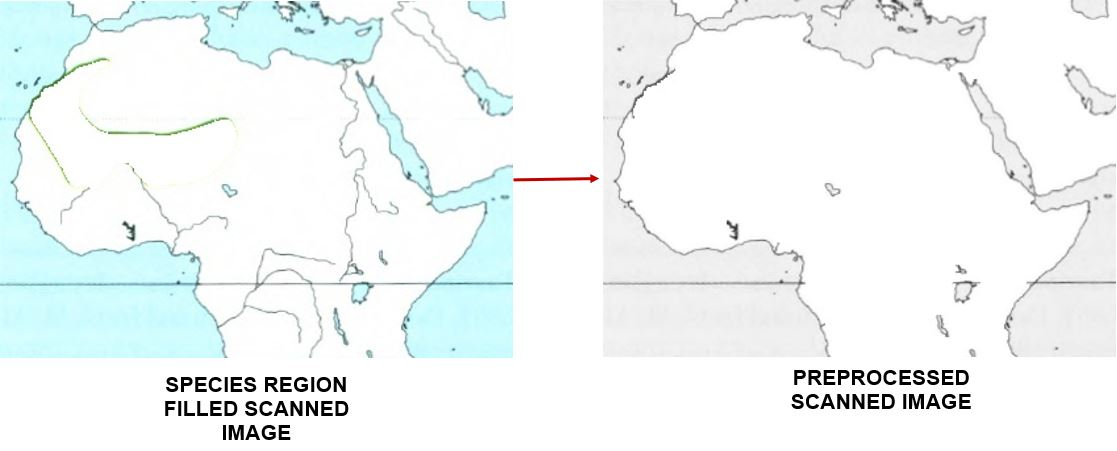

In [52]:
def preprocess(input_img, kernel_size):
    """
    Create a binary mask and get rid of features such as rivers, discontinuities

    :param input_img: Input image to be registered on the world map
    :param kernel_size: Kernel size for morphological operation

    :return
        preprocessed_img: Image without features such as rivers, discontinuities
    """

    if input_img.ndim != 2:
        input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    else:
        input_img_gray = input_img

    input_height = input_img_gray.shape[0]
    input_width = input_img_gray.shape[1]

    binary_mask = np.zeros((input_height, input_width),
                           dtype=np.uint8)

    for y in range(0, input_height):
        for x in range(0, input_width):
            if input_img_gray[y][x] > HOMOGENIZE_UPPER_THRESHOLD:
                binary_mask[y][x] = 255

    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    binary_mask_closed = cv2.morphologyEx(binary_mask,
                                          cv2.MORPH_CLOSE, kernel)

    binary_mask_closed_eroded = cv2.erode(binary_mask_closed,
                                          kernel, iterations=1)

    preprocessed_img = np.zeros((input_height, input_width),
                                dtype=np.uint8)

    for y in range(0, input_height):
        for x in range(0, input_width):
            if binary_mask_closed_eroded[y][x] == 255:
                preprocessed_img[y][x] = 255
            else:
                # modified_input_img[y][x] = input_img[y][x]
                preprocessed_img[y][x] = input_img_gray[y][x]

    return preprocessed_img

The following function converts the pre-processed gray scale scanned image and world map image to binary format which is required in computing the homography transform. The expected outputs of the function for the two different inputs are shown below:

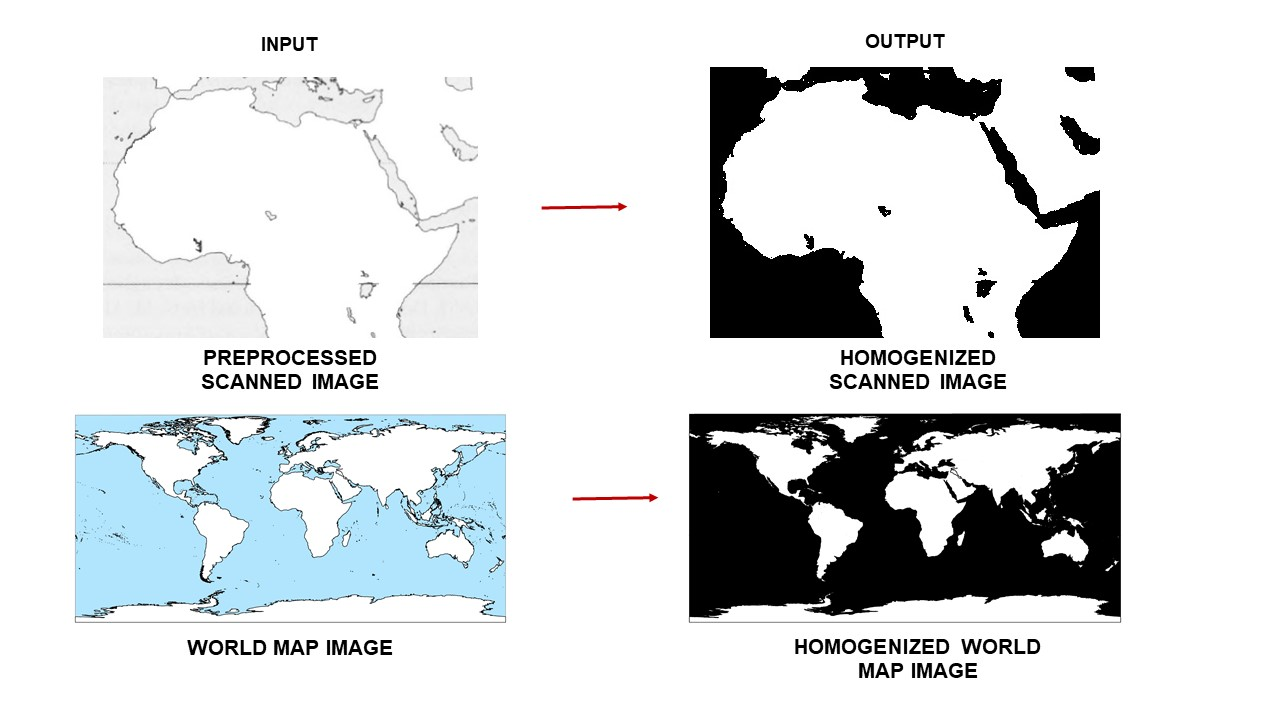

In [53]:
def homogenize(input_img):
    """
    Converts color image to binary image with landmass depicted in white and
    other regions depicted in black, also filling the species region pixels

    :param input_img: Input image to be homogenized

    :returns:
        homogenized_img: Homogenized Image
    """

    if input_img.ndim != 2:
        input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    else:
        input_img_gray = input_img

    homogenized_img = np.zeros((input_img_gray.shape[0],
                                input_img_gray.shape[1]), dtype=np.uint8)

    input_img_height = input_img_gray.shape[0]
    input_img_width = input_img_gray.shape[1]

    for y in range(0, input_img_height):
        for x in range(0, input_img_width):
            if input_img_gray[y][x] >= HOMOGENIZE_UPPER_THRESHOLD:
                homogenized_img[y][x] = 255
            else:
                homogenized_img[y][x] = 0

    return homogenized_img

## Define math functions
The following functions are math functions utilized by the core algorithmic modules. 

The following function is used for making window size of ROI in the control point search adaptive to the size of the input scanned images. 

In [54]:
def calculate_diagonal_length(length, height):
    """
    Find the length of diagonal of a rectangle

    :param length: Length of rectangle
    :param height: Height of rectangle

    :returns:
        length_diag: Length of the diagonal
    """

    length_diag = math.sqrt((length)** 2 + (height)** 2)

    return length_diag

The following function helps to transform points in the co-ordinate system of a smaller region of an image to the full image co-ordinate system.

In [55]:
def add_offset_to_points(input_contour, offset_x, offset_y):
    """
    Add offset to points on contour

    :param input_contour: Contour which needs to be processed
    :param offset_x: Offset which needs to be added in x co-ordinate
    :param offset_y: Offset which needs to be added in y co-ordinate

    :returns: 
        input_contour: Contour with offsetted points
    """

    for point in input_contour:
        point[0][0] += offset_x
        point[0][1] += offset_y

    return input_contour

The following function helps to qualify the ROI regions which are suitable for performing control points correspondence search. 

In [56]:
def calculate_nonzero_ratio(input_img):
    """
    Calculates the ratio of non zero pixels area w.r.t entire area of image
    
    :param: input_img: Image for which ratio needs to be computed
    
    :returns:
        ratio: Non-zero area ratio
    """
    
    non_zero_area = cv2.countNonZero(input_img)
    total_area = input_img.shape[0] * input_img.shape[1]

    ratio = non_zero_area / total_area

    return ratio

The following function is used to compute the centroid of the patch in the world map image corresponding to a patch in the scanned map image. This function is helpful when patches close to the boundary of the scanned map image do not have centroid at the exact center of the bounding box rectangle. 

In [57]:
def calculate_distance_ratios(bb_start_x, bb_start_y, bb_end_x, bb_end_y, point_x, point_y):
    """
    Calculates ratios of distances for X and Y from starting and ending co-ordinate of 
    X and Y respectively.
    
    :param: bb_start_x: X co-ordinate of left top corner of bounding box
    :param: bb_start_y: Y co-ordinate of left top corner of bounding box
    :param: bb_end_x: X co-ordinate of right bottom corner of bounding box
    :param: bb_end_y: Y co-ordinate of right bottom corner of bounding box
    :param: point_x: X co-ordinate of the point for which ratios need to be computed
    :param: point_y: Y co-ordinate of the point for which ratios need to be computed
    
    :returns:
        ratio_x: Ratio of distance of x co-ordinate of point from starting and ending
                 x co-ordinates of bounding box
        ratio_y: Ratio of distance of y co-ordinate of point from starting and ending
                 y co-ordinates of bounding box
    """

    # For numerical stability
    epsilon = 0.00001
        
    distance_point_x_start_x = point_x - bb_start_x
    distance_point_x_end_x = bb_end_x - point_x

    distance_point_y_start_y = point_y - bb_start_y
    distance_point_y_end_y = bb_end_y - point_y

    ratio_x = (distance_point_x_start_x / (distance_point_x_end_x + epsilon))

    ratio_y = (distance_point_y_start_y / (distance_point_y_end_y + epsilon))
    
    return ratio_x, ratio_y

The following function is used to correct the bounding box co-ordinates in case they violate the boundary conditions of the image co-ordinate system

In [58]:
def check_bb_boundary(bb_start_x, bb_start_y, bb_end_x, bb_end_y, height, width):
    """
    Checks the boundary and modifies the values if necessary
    
    :param: bb_start_x: X co-ordinate of left top corner of bounding box
    :param: bb_start_y: Y co-ordinate of left top corner of bounding box
    :param: bb_end_x: X co-ordinate of right bottom corner of bounding box
    :param: bb_end_y: Y co-ordinate of right bottom corner of bounding box
    :param: height: Height of the image
    :param: width: Width of the image
    
    :returns:
        bb_start_x: Modified X co-ordinate of left top corner of bounding box
        bb_start_y: Modified Y co-ordinate of left top corner of bounding box
        bb_end_x: Modified X co-ordinate of right bottom corner of bounding box
        bb_end_y: Modified Y co-ordinate of right bottom corner of bounding box
    """
    if bb_start_x < 0:
        bb_start_x = 0
   
    if bb_start_y < 0:
        bb_start_y = 0

    if bb_end_x >= width:
        bb_end_x = width - 1

    if bb_end_y >= height:
        bb_end_y = height - 1

    return bb_start_x, bb_start_y, bb_end_x, bb_end_y

The following function is used to check the difference between the results of the two computed homography transforms. The result of this function is used for the selection of the appropriate homography.

In [59]:
def calculate_iou_binary_images(image1, image2):
    """
    Calculate iou using two binary images

    :param image1: First binary image
    :param image2: Second binary image

    :returns:
        iou(float): Computed IOU value 
    """

    intersection_img = cv2.bitwise_and(image1, image2)
    intersection_pixels = cv2.countNonZero(intersection_img)

    union_img = cv2.bitwise_or(image1, image2)
    union_pixels = cv2.countNonZero(union_img)

    iou = intersection_pixels / union_pixels

    return iou


The following function converts latitude and longitude pair of values to image x and y co-ordinate values.

In [60]:
def convert_to_xy(lat_val, long_val):
    """
    Converts latitude and longitude to image x and y co-ordinates

    :param: lat_val: Latitude value of the world map point
    :param: long_val: Latitude value of the world map point

    :returns:
        [x_val, y_val]: Image x and y co-ordinates
    """

    x_val = (long_val - LONGITUDE_EXTREME_LEFT)/ \
                                   DEGREE_PER_PIXEL_X

    y_val = (lat_val - LATITUDE_EXTREME_TOP)/ \
                                  DEGREE_PER_PIXEL_Y

    return [int(x_val), int(y_val)]

The following function converts latitude and longitude pair of values to image x and y co-ordinate values for all points on the contour using the above defined function.

In [61]:
def calculate_contour_xy(list_lat_long):
    """
    Calculates image x and y co-ordinates for all points in latitude and longitude co-ordinates
    
    :param: list_lat_long: list of all lat-long pairs corresponding to points
    
    :returns:
        contour_xy: List of x-y pairs corresponding to points
    """
    contour_xy = []

    for point in list_lat_long:
        xy = convert_to_xy(point[1], point[0])
        contour_xy.append([xy])

    return contour_xy

The following function converts image x and y co-ordinate values to latitude and longitude values.

In [62]:
def convert_to_lat_long(x_val, y_val):
    """
    Converts image x and y co-ordinates to latitude and longitude co-ordinates 

    :param: x_val: Image x co-ordinate value of the world map point
    :param: y_val: Image y co-ordinate value of the world map point

    :returns:
        [lat_val, long_val]: lat-long co-ordinates value of the world map point 
    """

    long_val = LONGITUDE_EXTREME_LEFT \
                    + (DEGREE_PER_PIXEL_X * x_val)
    lat_val = LATITUDE_EXTREME_TOP \
                + (DEGREE_PER_PIXEL_Y * y_val)


    return [long_val, lat_val]

The following function converts image x and y co-ordinate values to latitude and longitude values for all points on the contour.

In [63]:
def calculate_contour_lat_long(input_contour):
    """
    Calculates latitude and longitude co-ordinates for x and y image co-ordinates of contour points
    
    :param: input_contour: Contour for which corresponding lat-long co-ordinates need to be computed
    
    :returns:
        list_long_lat: List of points in longitude and latitude co-ordinates
    """
    
    list_long_lat = []
    
    for point in input_contour:
        long_lat = convert_to_lat_long(point[0][0], point[0][1])
        list_long_lat.append(long_lat)
        
    return list_long_lat

## Define helper functions
The following helper functions are used for general purpose tasks such as writing an image to disk, writing shapefile etc.

To prevent overwriting results, the following helper function returns a timestamp string which gets appended as a prefix of all filenames. This functionality is optional and can be controlled using the constant **ENABLE_OUTPUT_WRITE**

In [64]:
from datetime import datetime

def find_current_timestamp():
    """
    Creates a string representing the current timestamp

    :returns: 
        timestamp_str: Current timestamp string in the format "%H_%M_%S_%f"
    """

    datetime_obj = datetime.now()
    timestamp_str = datetime_obj.strftime("%Y_%m_%d_%H_%M_%S_%f")
    return timestamp_str

The following function helps the user to write the output images to disk. This functionality is optional and can be controlled using the constant **ENABLE_OUTPUT_WRITE**

In [65]:
current_image_prefix = ""

def write_image_to_disk(image_to_write, image_suffix):
    """
    Saves image to disk

    :param image_to_write: Image which needs to be written to disk
    :param image_suffix: Suffix for the image name to be formed
    
    :returns: 
        None
    """
    
    if not ENABLE_OUTPUT_WRITE:
        return
    
    image_dir = RESULTS_FOLDER + "\\" + current_image_prefix
    
    # Create directory if it does not exist
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    
    filename_prefix = ""
    if ENABLE_TIMESTAMP:
        filename_prefix = find_current_timestamp()
        
    image_name = current_image_prefix + "_" + image_suffix
    image_path =  image_dir + "\\" + filename_prefix\
                  + "_" + image_name + ".jpg"
    
    cv2.imwrite(image_path, image_to_write)

The following function creates a world map using shapefile input.

In [66]:
def make_world_map_from_shapefile():
    """
    Creates world map using shapefile
    
    :returns:
        world_map_img: Color image of the world map
    """
    
    data_frame = arcgis.features.GeoAccessor.from_featureclass(os.path.join(WORLD_MAP_IMAGE_PATH, WORLD_MAP_IMAGE_NAME))
    data_frame

    contours = []
    max_length = -1
    max_index = -1

    for index in data_frame.index:
        #print(type(data_frame['SHAPE'][index]['rings']))
        contour = calculate_contour_xy(data_frame['SHAPE'][index]['rings'][0])
        length = len(contour)
        if length > max_length:
            max_length = length
            max_index = index

        contours.append(np.array(contour))

    world_map_img = np.zeros((WORLD_MAP_HEIGHT, WORLD_MAP_WIDTH, 3), dtype=np.uint8)
    world_map_img[:, :, 0] = COLOR_WATER_BLUE_VALUE
    world_map_img[:, :, 1] = COLOR_WATER_GREEN_VALUE
    world_map_img[:, :, 2] = COLOR_WATER_RED_VALUE
    world_map_img = cv2.drawContours(world_map_img, contours,
                                     -1, (255, 255, 255), cv2.FILLED)
    
    return world_map_img

The following function returns world map image based on the format of input file provided.

In [67]:
def get_world_map():
    """
    Returns world map image based on the format of file provided
    :returns
        world_map: Color image of world map
    """

    world_map = None

    if WORLD_MAP_IMAGE_NAME.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif', '.bmp', '.gif')):
        world_map = cv2.imread(os.path.join(WORLD_MAP_IMAGE_PATH, WORLD_MAP_IMAGE_NAME))
        world_map = cv2.resize(world_map, (WORLD_MAP_WIDTH, WORLD_MAP_HEIGHT))

    elif WORLD_MAP_IMAGE_NAME.lower().endswith('.shp'):
        world_map = make_world_map_from_shapefile()
        
    return world_map

The following function writes the output as shapefile when the constant **WRITE_SHAPEFILE** is True.

In [93]:
from pandas import DataFrame
from arcgis.geometry import Polygon
from arcgis.features import GeoAccessor, SpatialDataFrame

def write_shapefile(input_contours, output_dir, file_name):
    """
    Creates data frame using input contours for feature layer creation

    :param: input_contours: Contours which need to be transformed to lat-long co-ordinates
    :param: output_dir: Output directory in which the shapefile needs to be written
    :param: file_name: Filename of shapefile

    :returns:
        None
    """

    data = []
    for index, contour in enumerate(input_contours):
        shape = dict()
        shape['rings'] = []
        list_long_lat = calculate_contour_lat_long(contour)
        shape['rings'].append(list_long_lat)
        shape['spatialReference'] = {'wkid': 4326}
        shape["hasZ"] = False
        shape["hasM"] = False
        species_name = file_name
        scanned_img = file_name + ".jpg"
        data.append([index, shape, species_name, scanned_img])

    data_frame = DataFrame(data, columns=['FID', 'SHAPE', 'SPECIES', 'SCANNED'])

    data_frame['SHAPE'] = data_frame['SHAPE'].apply(Polygon)
    data_frame.spatial.set_geometry('SHAPE', 4326)

    #output_dir = RESULTS_FOLDER + "\\" + current_image_prefix

    # Create directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    filename_prefix = ""
    if ENABLE_TIMESTAMP:
        filename_prefix = find_current_timestamp()

    #file_name = current_image_prefix
    file_path = output_dir + "\\" + filename_prefix \
                + "_" + file_name + ".shp"

    data_frame.spatial.to_featureclass(file_path)

The following function combines shapefiles to generate a single shapefile.

In [69]:

def combine_shapefiles(input_dir, output_dir, file_name):
    """
    Combines shapefile outputs in a particular folder

    :param: input_dir: Input directory containing shapefiles
    :param: output_dir: Output directory where combined shapefile needs to be dumped
    :param: file_name: Filename of the combined shapefile

    :returns:
        None
    """
    shapefiles = []

    for root, directories, file_names in os.walk(input_dir):
        for file in file_names:
            if file.endswith(".shp"):
                shapefiles.append(os.path.join(root, file))

    data = []
    fid = 0
    for shapefile in shapefiles:
        df = arcgis.features.GeoAccessor.from_featureclass(shapefile)
        indexes = df.index
        number_of_rows = len(indexes)

        for i in range(0, number_of_rows):
            rings = df['SHAPE'][i]['rings']
            species = df['SPECIES'][i]
            scanned_img = df['SCANNED'][i]

            shape = dict()
            shape['rings'] = rings
            shape['spatialReference'] = {'wkid': 4326}
            shape["hasZ"] = False
            shape["hasM"] = False
            data.append([fid, shape, species, scanned_img])
            fid = fid + 1

    data_frame = DataFrame(data, columns=['FID', 'SHAPE', 'SPECIES', 'SCANNED'])

    data_frame['SHAPE'] = data_frame['SHAPE'].apply(Polygon)
    data_frame.spatial.set_geometry('SHAPE', 4326)

    #print(data_frame)

    # Create directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    filename_prefix = ""
    if ENABLE_TIMESTAMP:
        filename_prefix = find_current_timestamp()

    #file_name = current_image_prefix
    file_path = output_dir + "\\" + filename_prefix \
                + "_" + file_name + ".shp"

    data_frame.spatial.to_featureclass(file_path)

The following functions displays the scanned image and the mapped species region on the world map

In [90]:
import matplotlib.pyplot as plt

def plot_results(images, cols = 1, titles = None):
    """
    Plots the scanned image and the corresponding mapped species region ROI on the world map
    
    :param: images: List of images to be plotted
    :param: cols(Default = 1): Number of columns in plotting window
    :param: titles: list of titles corresponding to each image
    
    :returns:
        None
    """
    
    if not SHOW_RESULTS:
        return
    
    assert((titles is None)or (len(images) == len(titles)))
    
    num_images = len(images)
    if titles is None: 
        titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
        
    fig = plt.figure()
    for index, (image, title) in enumerate(zip(images, titles)):
        subplot = fig.add_subplot(np.ceil(num_images/float(cols)), cols, index + 1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        subplot.set_title(title)
        
    fig.set_size_inches(np.array(fig.get_size_inches()) * num_images)
    fig.suptitle(current_image_prefix, y=0.75)
    plt.show()

## Define annotation functions
The following functions are used for annotating the intermediate result images.

The following function helps to color code points in such a way that corresponding points on the scanned image and world map are of the same color hence making it easy to visualize the correspondence results.

In [71]:
def create_random_color_list(size):
    """
    Generate a list of specified size with random color values

    :param size: Size of the list which needs to be returned

    :returns:
       color_list: List of random color values
    """

    color_list = []

    for i in range(0, size):
        color_tuple = tuple(np.random.choice(range(256), size=3))
        color_tuple = tuple([int(x) for x in color_tuple])
        color_list.append(color_tuple)

    return color_list

The following function annotates control point pairs obtained from the correspondence estimation step.

In [72]:
def annotate_control_pts(world_map, query_image, control_pts):
    """
    Annotate control points on world map and query image
    
    :param: world_map: Color image of world map
    :param: query_image: Query image
    :param: control_pts: Control points to be annotated
    
    :returns:
        world_map_img_copy: Annotated world map image
        query_image_copy: Annotated query image
    """
    world_map_img_copy = world_map.copy()
    query_image_copy = query_image.copy()

    colors = create_random_color_list(len(control_pts))

    for i, control_pt in enumerate(control_pts):
        color = colors[i]
        color = tuple([int(x) for x in color])

        query_image_copy = cv2.drawMarker(query_image_copy,
                                          (control_pt[0], -1 * control_pt[1]), color)

        world_map_img_copy = cv2.drawMarker(world_map_img_copy,
                                            (int(control_pt[5]), int(-1 * control_pt[6])), color)

    return world_map_img_copy, query_image_copy

## Define core algorithm functions
The following functions are the core algorithmic functions used to compute the transform for the scanned images onto the world map.

The following function detects contours or list of connected points in the input image. Sample contour outputs are displayed in the form of an image below: 

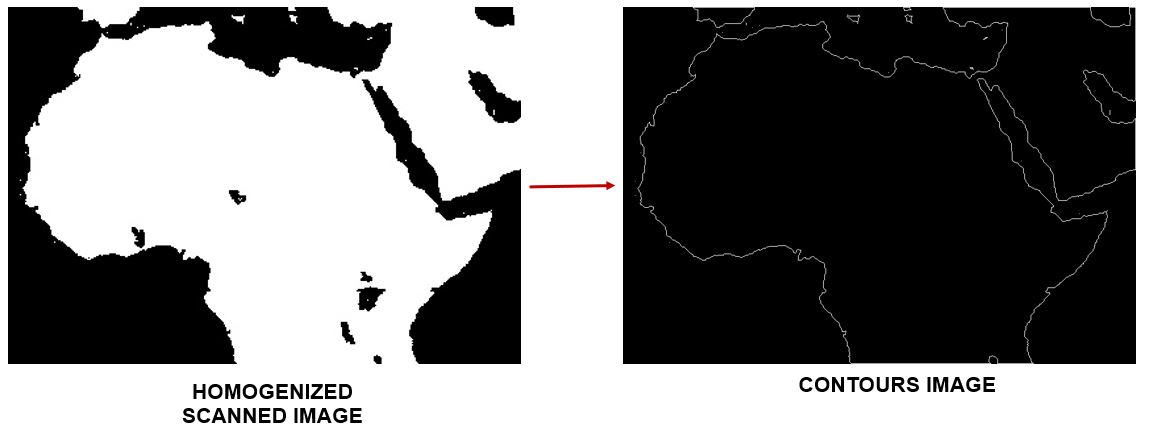

In [73]:
def detect_contours(input_img):
    """
    Detects contours in the input image
    
    :param input_img : Input image for which contours need to be computed
    
    :returns:
        contours : List of computed contours for the input image
    """
    if input_img.ndim != 2:
        input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    else:
        input_img_gray = input_img

    ret, input_img_gray_thresh = cv2.threshold(input_img_gray, 127, 255, 0)

    contours, hierarchy = cv2.findContours(input_img_gray_thresh,
                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

The following function is used for finding the location of the best match of a smaller image (template) in a larger image assuming it exists in the larger image. Multiple scales of the bigger image are used for this task because template matching is not scale-invariant (Size of the template / search image matters). The expected results are shown below:

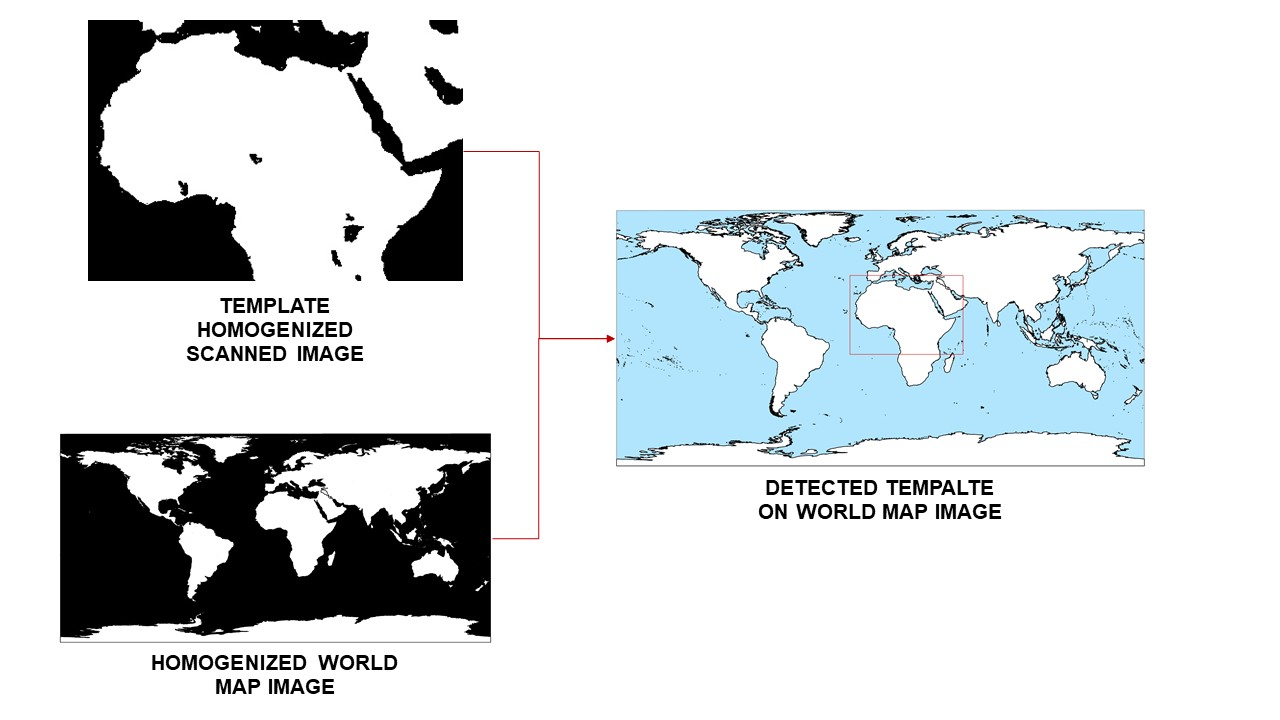

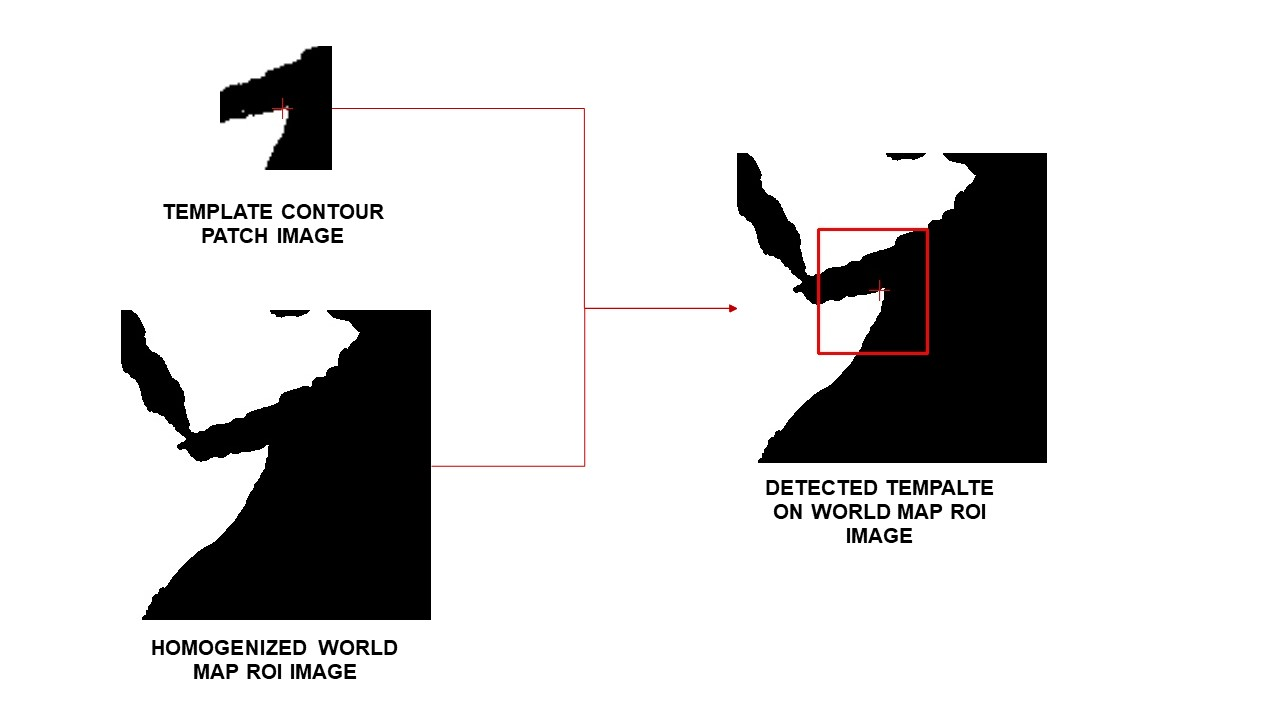

In [74]:
def detect_template(template, search_img, start_scale, end_scale, num_scales):
    """
    Performs template matching to locate the template in the world map

    :param template: Template image which needs to be registered on the world map
    :param search_img: Image in which template needs to be searched
    :param start_scale: Starting value of scale interval
    :param end_scale: Ending value of scale interval
    :param num_scales: Number of scales within the scale interval

    :returns:
        start_x: Starting X co-ordinate of detected bounding box
        start_y: Starting Y co-ordinate of detected bounding box
        end_x: Ending X co-ordinate of detected bounding box
        end_y: Ending Y co-ordinate of detected bounding box
        max_val: Value of template match score for the detected bounding box
        scale_factor: Scale at which the match was found for the template

    """

    template_height = template.shape[0]
    template_width = template.shape[1]

    start_x = 0
    start_y = 0
    end_x = 0
    end_y = 0
    max_val = -1

    found = None
    # match_map_img = None

    # loop over the scales of the image
    for scale in np.linspace(start_scale, end_scale, num_scales)[::-1]:
        # resize the image according to the scale, and keep track
        # of the ratio of the resizing
        resized = imutils.resize(search_img,
                                 width=int(search_img.shape[1] * scale))

        scale_factor = search_img.shape[1] / float(resized.shape[1])

        # If the resized image is smaller than the template, then break
        # from the loop
        if resized.shape[0] < template_height or resized.shape[1] < template_width:
            break

        # Match the template in the resized image and store the result image
        result = cv2.matchTemplate(resized, template, cv2.TM_CCOEFF)

        # Find the maximum template match score and location in the result image
        (_, max_val, _, max_loc) = cv2.minMaxLoc(result)

        # If there is a new maximum correlation value, then update
        # the bookkeeping variable
        if found is None or max_val > found[0]:
            found = (max_val, max_loc, scale_factor)
            # match_map_img = result

    # Check if we have found a match
    if found is not None:

        # Unpack the bookkeeping variable and compute the (x, y) coordinates
        # of the bounding box based on the resized ratio
        (max_val, max_loc, scale_factor) = found
        (start_x, start_y) = (int(max_loc[0] * scale_factor), int(max_loc[1] * scale_factor))
        (end_x, end_y) = (int((max_loc[0] + template_width) * scale_factor),
                          int((max_loc[1] + template_height) * scale_factor))
    else:
        max_val = -1

    return start_x, start_y, end_x, end_y, max_val, scale_factor

The following function is used to apply a computed homography transform on the scanned image so that it can be registered on the world map image

In [75]:
def apply_homography(query_img, world_map, homography_matrix):
    """
    Applies estimated homography on template image and returns modified world map

    :param: query_img: Image to be processed
    :param: world_map: World map image
    :param: homography_matrix: Homography matrix to be used

    :returns:
        modified_world_map: Modified world map image
    """

    world_map_height = world_map.shape[0]
    world_map_width = world_map.shape[1]

    warped_query_img = cv2.warpPerspective(query_img, homography_matrix,
                                           (world_map_width, world_map_height))

    return warped_query_img
    
    """
    modified_world_map = world_map.copy()

    for y in range(0, world_map_height):
        for x in range(0, world_map_width):
            if warped_query_img[y][x][0] != 0:
                modified_world_map[y][x][0] = warped_query_img[y][x][0]
                modified_world_map[y][x][1] = warped_query_img[y][x][1]
                modified_world_map[y][x][2] = warped_query_img[y][x][2]

    return modified_world_map
    """

The following function computes the reference homography using the 4 pairs of points obtained from matching the entire homogenized scanned map template image with the homogenized world map image. Sample output of the homography matrix when applied to the scanned map image using apply_homography function defined above is shown below:

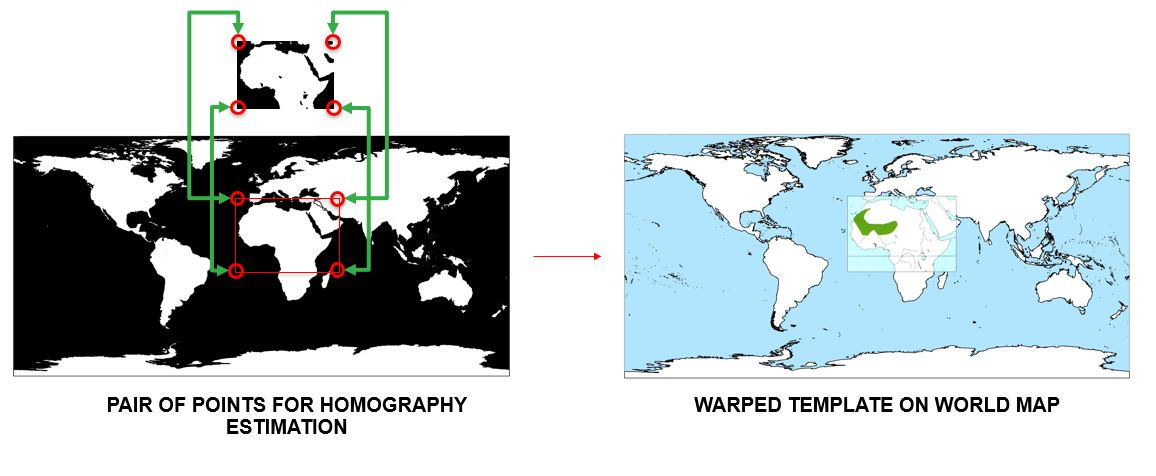

In [76]:
def compute_reference_homography(bb_start_x, bb_start_y,
                                 bb_end_x, bb_end_y,
                                 world_map_height, world_map_width,
                                 template_height, template_width):
    """
    Computes the homography transform mapping query image onto world map

    :param bb_start_x : bounding box left x co-ordinate
    :param bb_start_y : bounding box top y co-ordinate
    :param bb_end_x : bounding box right x co-ordinate
    :param bb_end_y : bounding box bottom x co-ordinate
    :param world_map_height: Height of world map
    :param world_map_width: Width of world map
    :param template_height: Height of template image
    :param template_width: Width of template image

    :returns:
        homography_matrix : Computed transformation matrix
    """

    src_points = np.array([[0, 0],
                           [template_width - 1, 0],
                           [template_width - 1, template_height - 1],
                           [0, template_height - 1]],
                          dtype=np.float32)

    dst_points = np.array([[bb_start_x, bb_start_y],
                           [bb_end_x, bb_start_y],
                           [bb_end_x, bb_end_y],
                           [bb_start_x, bb_end_y]],
                          dtype=np.float32)

    # Compute the reference homography using perspective transform function of OpenCV
    homography_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    return homography_matrix

The following function estimates the control point pairs by traversing the contours of scanned image and finding the corresponding matches on the world map ROI image. The world map ROI image is obtained by padding the detected bounding box in the template matching step. Sample output of control points on both the scanned map image and world map image are shown below:

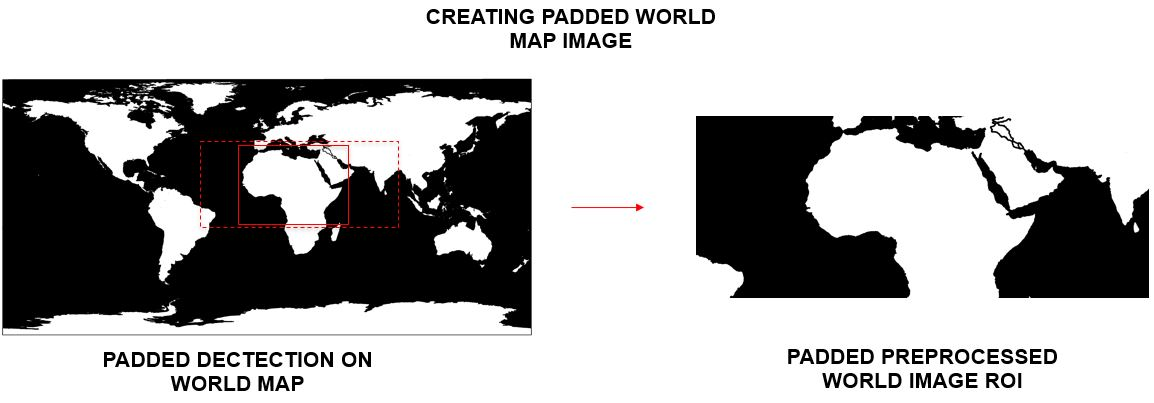

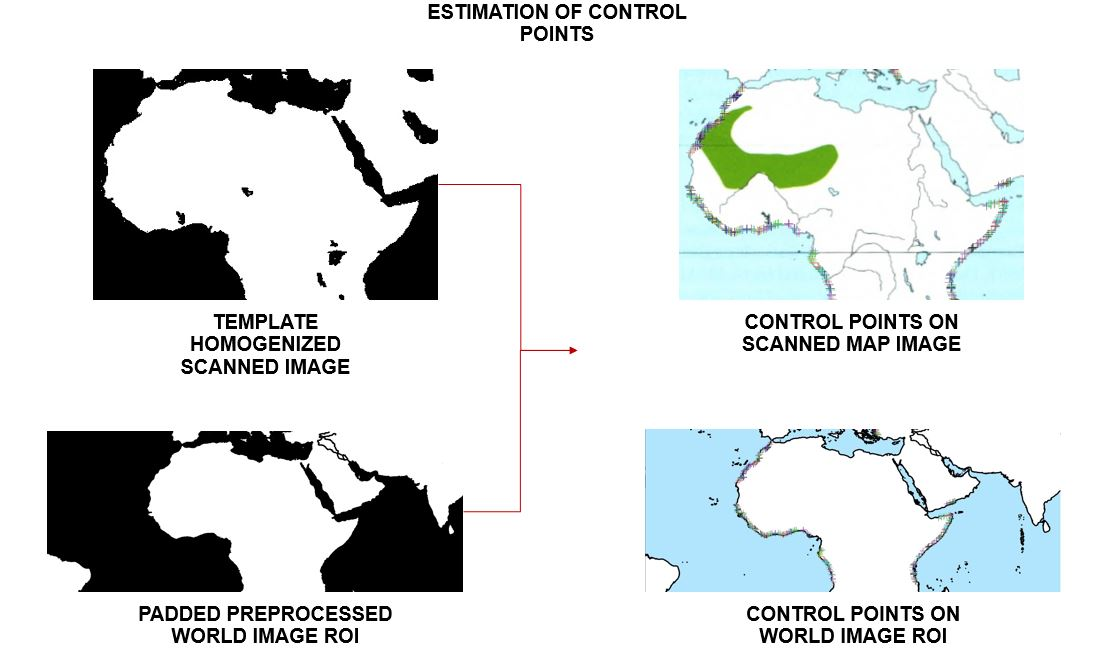

In [77]:
def estimate_control_points(world_map_roi_processed, template,
                            world_map_roi_processed_offset_x,
                            world_map_roi_processed_offset_y,
                            world_map_roi_processed_start_x,
                            world_map_roi_processed_start_y,
                            template_warped_start_x,
                            template_warped_start_y):
    """
    Detects contours in template image and finds correpondences in processed world map image ROI

    :param world_map_roi_processed: Processed world map image ROI
    :param template: Template image
    :param world_map_roi_processed_offset_x: X Margin for world map ROI w.r.t warped template
    :param world_map_roi_processed_offset_y: Y Margin for world map ROI w.r.t warped template
    :param world_map_roi_processed_start_x: X co-ordinate of left top corner of world map roi
    :param world_map_roi_processed_start_y: Y co-ordinate of left top corner of world map roi
    :param template_warped_start_x: X co-ordinate of left top corner of warped template
    :param template_warped_start_y: Y co-ordinate of left top corner of warped template

    :returns:
        mapped_control_pts: List of control points in template and corresponding points in
                            world map
    """
    # Detect contours in world map roi and template
    world_map_roi_contours = detect_contours(world_map_roi_processed)
    template_contours = detect_contours(template)

    # Find the biggest template contour in terms of area
    biggest_template_contour = max(template_contours, key=cv2.contourArea)

    template_contour_img = template.copy()
    template_contour_img = cv2.drawContours(template_contour_img, [biggest_template_contour],
                                            -1, (128, 128, 128), 4)

    write_image_to_disk(template_contour_img, "template_contour_img")

    # Create list of contour points in template for which matches need to be found
    contour_pts = []

    (bb_cnt_xmin, bb_cnt_ymin, bb_cnt_width, bb_cnt_height) = \
        cv2.boundingRect(biggest_template_contour)

    bb_cnt_area = bb_cnt_width * bb_cnt_height
    template_area = template.shape[0] * template.shape[1]

    area_ratio = bb_cnt_area / template_area

    if area_ratio < CONTOUR_RECT_AREA_RATIO_THRESHOLD:
        for contour in template_contours:
            for contour_pt in contour:
                contour_pts.append(contour_pt)

    else:
        contour_pts = biggest_template_contour

    # Initialize parameters for patch matching
    length_diagonal_template_img = calculate_diagonal_length(template.shape[1],
                                                             template.shape[0])
    contour_patch_window = int(length_diagonal_template_img
                               / CONTOUR_PATCH_SIZE_FACTOR)

    delta_contour_patch_window = contour_patch_window / 2

    world_img_patch_window = int(contour_patch_window * WORLD_MAP_PATCH_SIZE_FACTOR)
    delta_world_map_patch_window = (world_img_patch_window / 2)

    mapped_control_pts = []

    for contour_pt in contour_pts:

        contour_pt_x = contour_pt[0][0]
        contour_pt_y = contour_pt[0][1]

        # Create contour patch around contour point
        contour_patch_start_y = contour_pt_y - delta_contour_patch_window
        contour_patch_end_y = contour_pt_y + delta_contour_patch_window
        contour_patch_start_x = contour_pt_x - delta_contour_patch_window
        contour_patch_end_x = contour_pt_x + delta_contour_patch_window

        contour_patch_start_x, contour_patch_start_y, contour_patch_end_x, contour_patch_end_y = \
            check_bb_boundary(contour_patch_start_x, contour_patch_start_y,
                              contour_patch_end_x, contour_patch_end_y,
                              template.shape[0], template.shape[1])

        contour_patch = template[int(contour_patch_start_y): int(contour_patch_end_y),
                        int(contour_patch_start_x): int(contour_patch_end_x)]

        # write_image_to_disk(contour_patch, "contour_patch")

        # Check if contour patch is qualified for matching
        contour_patch_non_zero_ratio = calculate_nonzero_ratio(contour_patch)

        if contour_patch_non_zero_ratio > CONTOUR_PATCH_NON_ZERO_THRESHOLD:
            continue

        world_map_patch_start_y = contour_pt_y - delta_world_map_patch_window \
                                  + world_map_roi_processed_offset_y
        world_map_patch_end_y = contour_pt_y + delta_world_map_patch_window \
                                + world_map_roi_processed_offset_y
        world_map_patch_start_x = contour_pt_x - delta_world_map_patch_window \
                                  + world_map_roi_processed_offset_x
        world_map_patch_end_x = contour_pt_x + delta_world_map_patch_window \
                                + world_map_roi_processed_offset_x

        world_map_patch_start_x, world_map_patch_start_y, world_map_patch_end_x, world_map_patch_end_y = \
            check_bb_boundary(world_map_patch_start_x, world_map_patch_start_y,
                              world_map_patch_end_x, world_map_patch_end_y,
                              world_map_roi_processed.shape[0], world_map_roi_processed.shape[1])

        world_map_patch = world_map_roi_processed[int(world_map_patch_start_y): int(world_map_patch_end_y),
                          int(world_map_patch_start_x): int(world_map_patch_end_x)]

        # write_image_to_disk(world_map_patch, "world_map_patch")

        # Check if world map patch is qualified for matching
        world_img_patch_non_zero_ratio = calculate_nonzero_ratio(world_map_patch)

        if world_img_patch_non_zero_ratio > WORLD_MAP_PATCH_NON_ZERO_THRESHOLD:
            continue

        detection_start_x, detection_start_y, detection_end_x, detection_end_y, detection_val, scale_factor = \
            detect_template(contour_patch, world_map_patch, 1.0, 1.0, 1)

        if detection_val > 0:
            # Compute centroid in detected world map patch
            ratio_x, ratio_y = \
                calculate_distance_ratios(contour_patch_start_x, contour_patch_start_y,
                                          contour_patch_end_x, contour_patch_end_y,
                                          contour_pt_x, contour_pt_y)

            world_map_patch_centroid_x = ((ratio_x * detection_end_x) + detection_start_x) / (ratio_x + 1)
            world_map_patch_centroid_y = ((ratio_y * detection_end_y) + detection_start_y) / (ratio_y + 1)

            # Transform centroid to world map co-ordinates
            centroid_world_map_detection_x = world_map_patch_centroid_x \
                                             + world_map_patch_start_x \
                                             + world_map_roi_processed_start_x
            centroid_world_map_detection_y = world_map_patch_centroid_y \
                                             + world_map_patch_start_y \
                                             + world_map_roi_processed_start_y

            # Calculate latitude and longitude co-ordinates
            centroid_world_map_detection_x_long = LONGITUDE_EXTREME_LEFT \
                                                  + (DEGREE_PER_PIXEL_X * centroid_world_map_detection_x)
            centroid_world_map_detection_y_lat = LATITUDE_EXTREME_TOP \
                                                 + (DEGREE_PER_PIXEL_Y * centroid_world_map_detection_y)

            mapped_control_pts.append([contour_pt_x, -1 * contour_pt_y,
                                       centroid_world_map_detection_x_long,
                                       centroid_world_map_detection_y_lat,
                                       detection_val, centroid_world_map_detection_x,
                                       -1 * centroid_world_map_detection_y])

    return mapped_control_pts

The following function computes the refined homography using the control point pairs obtained from detecting contour patches of the homogenized scanned map image template in the world map ROI image depicted in the previous step. Sample output of the homography matrix when applied to the scanned map image using apply_homography function defined above is shown below:

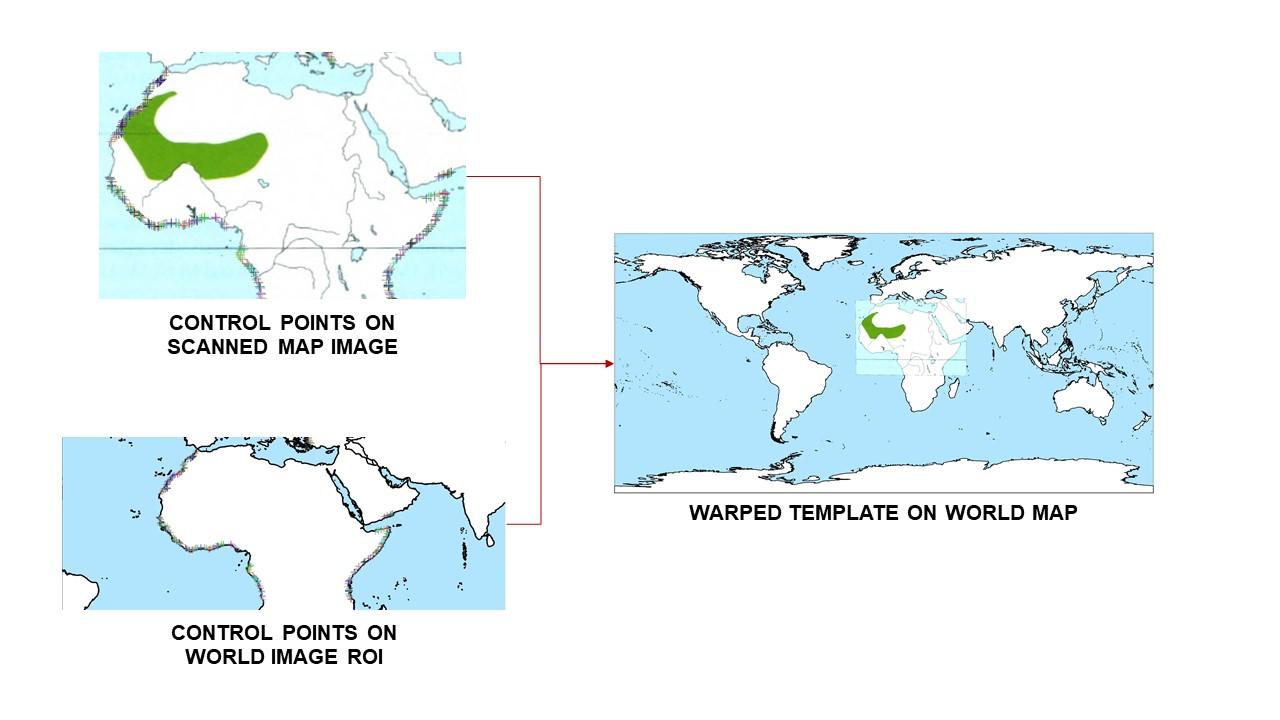

In [78]:
def compute_refined_homography_outlier_mask(control_pts):
    """
    Computes homography from mapped control points and outlier mask using RANSAC

    :param control_pts: List of control points in both query image and world map
                        co-ordinates

    :returns:
        homography_matrix: Computed Homography matrix
        outlier_mask: Mask array with flags indicating whether control points inlier or not
    """

    if len(control_pts) < 4:
        return None, None

    src_points = np.zeros((len(control_pts), 2), dtype=np.float32)
    dst_points = np.zeros((len(control_pts), 2), dtype=np.float32)

    for i, control_pt in enumerate(control_pts):
        src_points[i, 0] = control_pt[0]
        src_points[i, 1] = -1 * control_pt[1]
        dst_points[i, 0] = control_pt[5]
        dst_points[i, 1] = -1 * control_pt[6]

    homography_matrix, outlier_mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 4)

    return homography_matrix, outlier_mask

The following function filters the control points using the outlier mask returned by the previous function. Sample output of control points annotated on an image is shown below:

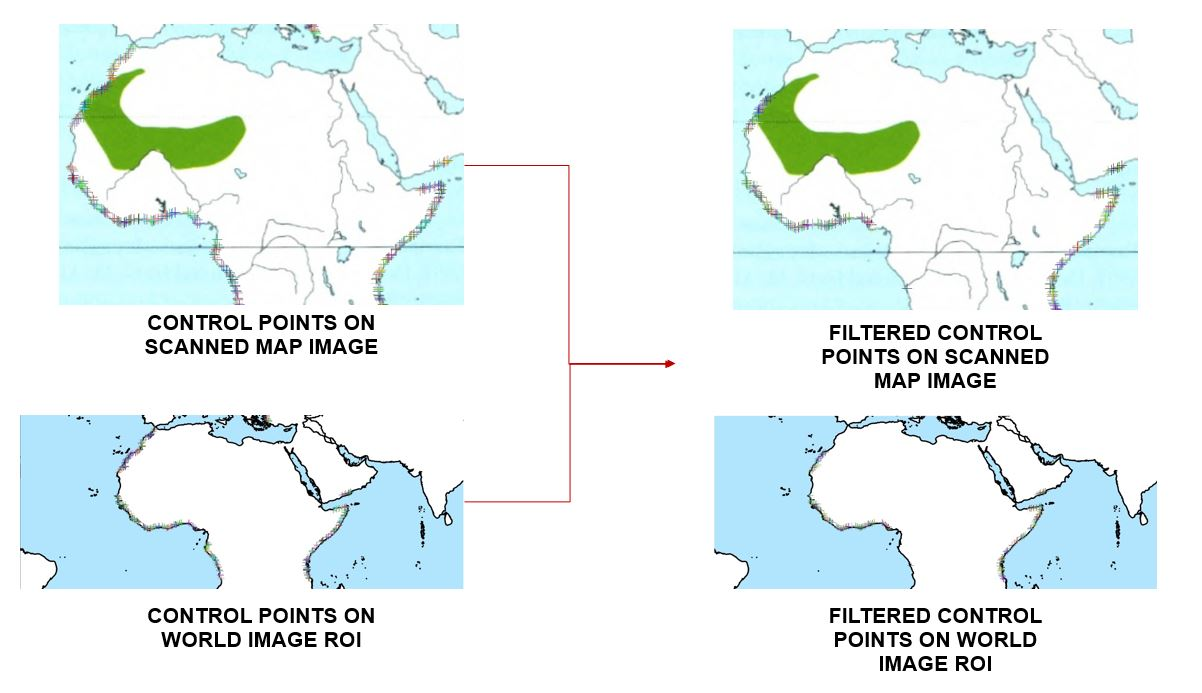

In [79]:
def filter_control_pts(control_pts, outlier_mask):
    """
    Filter outliers from control points using outlier mask
    
    :param: control_pts: Input control points to be filtered
    :param: outlier_mask: Outlier mask with flags indicating whether outlier or not
    
    :returns:
        filtered_control_pts: Control Points without outliers
    """
    filtered_control_pts = []

    for i, control_pt in enumerate(control_pts):
        if outlier_mask[i] == 1:
            filtered_control_pts.append(control_pt)

    return filtered_control_pts

The following function is used in the refinement of detected control points on the world map.

In [80]:
def find_nearest_contour_point(input_contour, pt_x, pt_y):
    """
    Find point on contour which is nearest to the given point
    
    :param input_contour: Contour on which points needs to be evaluated for nearness
    :param pt_x: X co-ordinate of point
    :param pt_y: Y co-ordinate of point
    
    :returns:
        min_x: X co-ordinate of contour point nearest to input point
        min_y: Y co-ordinate of contour point nearest to input point
        min_index: Index of contour point nearest to input point
        min_distance: Distance of contour point nearest to input point
    """

    distance = cv2.pointPolygonTest(contour, (pt_x, pt_y), True)

    min_distance = float("inf")
    min_index = -1
    min_x = -1
    min_y = -1

    for i, contour_pt in enumerate(contour):
        distance = find_distance(contour_pt[0][0], contour_pt[0][1], pt_x, pt_y)

        if distance < min_distance:
            min_distance = distance
            min_index = i
            min_x = contour_pt[0][0]
            min_y = contour_pt[0][1]

    return min_x, min_y, min_index, min_distance

The following function performs refinement of control points. The nearest point on the contour with the distance satisfying a threshold is taken to be the new control point. 

In [81]:
def refine_control_pts(control_pts, world_map_contour_processed):
    """
    Refines already detected control points using world map contour matching with
    biggest contour in query image
    
    :param control_pts: control points to be refined
    :param world_map_contour_processed: Offsetted world map contour

    :returns:
        control_pts: Refined control points
    """

    for control_pt in control_pts:
        min_x, min_y, min_index, min_distance = find_nearest_point_on_contour(
            world_map_contour_processed, control_pt[5],-1 * control_pt[6])

        if min_index > 0 and min_distance < REFINEMENT_DISTANCE_THRESHOLD:
            control_pt[5] = min_x
            control_pt[6] = -1 * (min_y)
            control_pt[2] = LONGITUDE_EXTREME_LEFT \
                            + (DEGREE_PER_PIXEL_X * min_x)

            control_pt[3] = LATITUDE_EXTREME_TOP \
                            + (DEGREE_PER_PIXEL_Y * min_y)

    return control_pts


The following function selects the best homography transform between reference homography and refined homography.

In [82]:
def compare_homography_matrices(reference_homography, refined_homography,
                                control_pts, outlier_mask,
                                template, world_map, warped_template_reference_homography,
                                warped_template_refined_homography):
    """
    Compares the estimated homographies and selects the better homography

    :param: reference_homography: Estimated reference homography
    :param: refined_homography: Estimated refined homography
    :param: control_pts: Control points used to compute refined homography
    :param: outlier_mask: Mask array depicting outliers and inliers
    :param: template: Template image used to compute control points
    :param: world_map: World map image

    :returns:
        final_homography: Selected homography matrix
    """

    control_pts_to_use = control_pts  # filter_control_pts(control_pts, outlier_mask)
    src_points = np.zeros((len(control_pts_to_use), 2), dtype=np.float32)
    min_x = float("inf")
    max_x = -1
    min_y = float("inf")
    max_y = -1

    for i, control_pt in enumerate(control_pts_to_use):
        src_points[i, 0] = control_pt[0]
        src_points[i, 1] = -1 * control_pt[1]

        if src_points[i, 0] > max_x:
            max_x = src_points[i, 0]
        if src_points[i, 0] < min_x:
            min_x = src_points[i, 0]

        if src_points[i, 1] > max_y:
            max_y = src_points[i, 1]
        if src_points[i, 1] < min_y:
            min_y = src_points[i, 1]

    min_area_rect = cv2.minAreaRect(src_points)
    area = (max_x - min_x) * (max_y - min_y)
    area_min_area_rect = min_area_rect[1][0] * min_area_rect[1][1]
    area_non_zero = cv2.countNonZero(template)

    area_ratio = area / area_non_zero

    world_map_height = world_map.shape[0]
    world_map_width = world_map.shape[1]

    warped_template_reference_homography = cv2.warpPerspective(template, reference_homography,
                                                               (world_map_width, world_map_height))

    warped_template_refined_homography = cv2.warpPerspective(template, refined_homography,
                                                             (world_map_width, world_map_height))

    iou = calculate_iou_binary_images(warped_template_reference_homography,
                                      warped_template_refined_homography)

    if area_ratio > CONTROL_POINTS_AREA_RATIO_THRESHOLD and \
            iou < IOU_THRESHOLD_HOMOGRAPHY:
        return refined_homography, 1
    else:
        return reference_homography, 0

The following function maps the species region on the world map using the computed homography matrices. Sample output of the mapped species region is shown below:

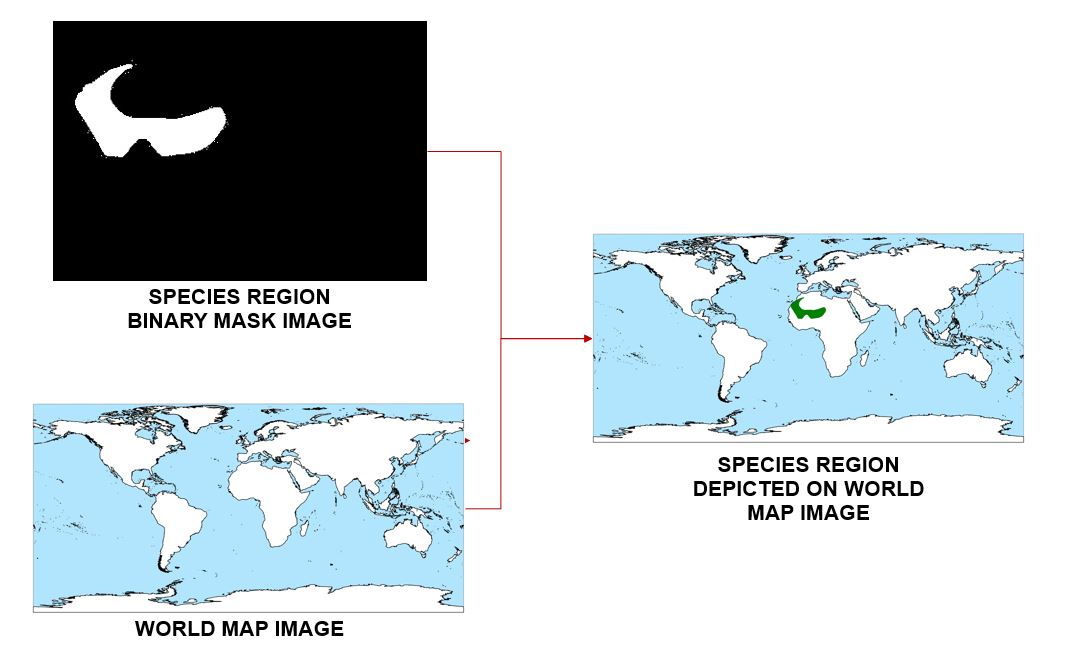

In [95]:
def map_species_region(region_mask_img, world_map, reference_homography, refined_homography,
                       selected_index, detection_start_x, detection_start_y, detection_end_x,
                       detection_end_y):
    """
    Maps the species region masks on the world map using the computed homography matrices

    :param: region_mask_img: Species region mask depicting species distribution
    :param: world_map: Color image of World Map
    :param: reference_homography: Computed Reference Homography
    :param: refined_homography: Computed Refined Homography
    :param: selected_index: Index indicating which homography matrix is the final computed homography
    :param: detection_start_x: X co-ordinate of the top left corner of detected bounding box
    :param: detection_start_y: Y co-ordinate of the top left corner of detected bounding box
    :param: detection_end_x: X co-ordinate of the bottom right corner of detected bounding box
    :param: detection_end_y: Y co-ordinate of the bottom right corner of detected bounding box

    :returns:
        mapped_species_region: World Map with species region mapped
    """

    world_map_height = world_map.shape[0]
    world_map_width = world_map.shape[1]

    # Warp species region mask image using reference homography
    warped_img = cv2.warpPerspective(region_mask_img, reference_homography,
                                     (world_map_width, world_map_height))

    if selected_index == 1:
        img_to_warp = warped_img[detection_start_y: detection_end_y, detection_start_x: detection_end_x]
        warped_img = cv2.warpPerspective(img_to_warp, refined_homography,
                                         (world_map_width, world_map_height))

    warped_img_contours = detect_contours(warped_img)

    if WRITE_SHAPEFILE:
        write_shapefile(warped_img_contours,
                        RESULTS_FOLDER + "\\" + current_image_prefix, current_image_prefix)
        
    modified_world_map = world_map.copy()
    modified_world_map = cv2.drawContours(modified_world_map, warped_img_contours,
                                          -1, (0, 128, 0), cv2.FILLED)

    return modified_world_map

The following function is the driver code for executing the image registration pipeline

In [84]:
def register(query_img_filepath, region_mask_filepath, world_map_orig):
    """
    Registers query image onto world map and maps the region onto world map

    :param: query_img_filepath: Path to the query image
    :param: region_img_filepath: Path to the region image
    :param: world_map_orig: Original color image of world map image

    :retuns:
        None
    """
    # Read the image to be registered
    query_img = cv2.imread(str(query_img_filepath))

    # Read the region image
    region_img = cv2.imread(str(region_mask_filepath))

    # Create species region mask
    region_mask_img = create_region_mask(region_img)

    # Fill the species region in the image to be registered
    query_img_filled = fill_mask_pixels(query_img, region_mask_img)

    # Create template image
    query_img_processed = preprocess(query_img_filled, PREPROCESS_KERNEL_SIZE)
    write_image_to_disk(query_img_processed, "query_img_processed")

    template = homogenize(query_img_processed)
    write_image_to_disk(template, "template")

    # Load world map image
    world_map_img = world_map_orig.copy()

    # Homogenized world image
    world_map_processed = homogenize(world_map_img)
    write_image_to_disk(world_map_processed, "world_map_processed")

    # Find template in world map
    detection_start_x, detection_start_y, detection_end_x, detection_end_y, detection_val, scale_factor = \
        detect_template(template, world_map_processed, 0.2, 2.0, 40)

    world_map_img_height = world_map_img.shape[0]
    world_map_img_width = world_map_img.shape[1]

    # Compute reference homography
    reference_homography = compute_reference_homography(detection_start_x, detection_start_y,
                                                        detection_end_x, detection_end_y,
                                                        world_map_processed.shape[0],
                                                        world_map_processed.shape[1],
                                                        template.shape[0], template.shape[1])

    reference_image = apply_homography(query_img, world_map_img, reference_homography)
    write_image_to_disk(reference_image, "reference_image")

    warped_template_image = cv2.warpPerspective(template, reference_homography,
                                                (world_map_img_width, world_map_img_height))
    warped_query_image = cv2.warpPerspective(query_img, reference_homography,
                                             (world_map_img_width, world_map_img_height))

    # Create warped template to be used for computing refined homography
    warped_template = warped_template_image[detection_start_y: detection_end_y,
                      detection_start_x: detection_end_x]

    warped_query = warped_query_image[detection_start_y: detection_end_y,
                   detection_start_x: detection_end_x]

    # Create world map roi image to be used for computing refined homography
    world_map_roi_margin_x = WORLD_MAP_IMAGE_PADDING_X
    world_map_roi_margin_y = WORLD_MAP_IMAGE_PADDING_Y

    world_map_roi_start_x = detection_start_x - world_map_roi_margin_x
    world_map_roi_end_x = detection_end_x + world_map_roi_margin_x
    world_map_roi_start_y = detection_start_y - world_map_roi_margin_y
    world_map_roi_end_y = detection_end_y + world_map_roi_margin_y

    world_map_roi_start_x, world_map_roi_start_y, world_map_roi_end_x, world_map_roi_end_y = \
        check_bb_boundary(world_map_roi_start_x, world_map_roi_start_y,
                          world_map_roi_end_x, world_map_roi_end_y,
                          world_map_processed.shape[0],
                          world_map_processed.shape[1])

    world_map_img_offset_start_x = detection_start_x - world_map_roi_start_x
    world_map_img_offset_start_y = detection_start_y - world_map_roi_start_y

    world_map_roi_processed = \
        world_map_processed[int(world_map_roi_start_y): int(world_map_roi_end_y),
        int(world_map_roi_start_x): int(world_map_roi_end_x)]

    write_image_to_disk(world_map_roi_processed, "world_map_roi_processed")

    # Calculate control point pairs
    control_pts = estimate_control_points(world_map_roi_processed, warped_template,
                                          world_map_img_offset_start_x,
                                          world_map_img_offset_start_y,
                                          world_map_roi_start_x,
                                          world_map_roi_start_y,
                                          detection_start_x,
                                          detection_start_y)

    world_map_control_pts, query_control_pts = annotate_control_pts(world_map_img, warped_query, control_pts)
    write_image_to_disk(world_map_control_pts, "world_map_control_pts")
    write_image_to_disk(query_control_pts, "query_control_pts")

    # Compute refined homography
    refined_homography, outlier_mask = compute_refined_homography_outlier_mask(control_pts)

    # Filter outliers
    filtered_control_pts = filter_control_pts(control_pts, outlier_mask)
    world_map_filtered_control_pts, query_filtered_control_pts = annotate_control_pts(world_map_img,
                                                                                      warped_query,
                                                                                      filtered_control_pts)
    write_image_to_disk(world_map_filtered_control_pts, "world_map_filtered_control_pts")
    write_image_to_disk(query_filtered_control_pts, "query_filtered_control_pts")

    refined_image = apply_homography(warped_query, world_map_img, refined_homography)
    write_image_to_disk(refined_image, "refined_image")

    # Comparison of reference homography with refined homography for selection of final homography
    final_homography, selected_index = compare_homography_matrices(reference_homography,
                                                                   refined_homography,
                                                                   control_pts, outlier_mask,
                                                                   warped_template, world_map_img,
                                                                   reference_image, refined_image)

    mapped_species_region_img = map_species_region(region_mask_img, world_map_img, reference_homography,
                                                   refined_homography, selected_index, detection_start_x,
                                                   detection_start_y, detection_end_x, detection_end_y)
    write_image_to_disk(mapped_species_region_img, "mapped_species_region_img")


    # Apply selected homography on the query image
    if selected_index == 0:
        final_image = apply_homography(query_img, world_map_img, final_homography)
    else:
        final_image = apply_homography(warped_query, world_map_img, final_homography)

    write_image_to_disk(final_image, "final_image")
    

    mapped_species_region_roi_img = mapped_species_region_img[world_map_roi_start_y: world_map_roi_end_y,
                                    world_map_roi_start_x: world_map_roi_end_x]

    plot_results([query_img, mapped_species_region_roi_img], 2, ["Scanned Image", "Mapped Image"])

## Run the image registration pipeline

Path to maps : C:\Users\ati11038\Documents\workspace\data\half_earth\extracted_samples\extracted_maps_2
Path to masks : C:\Users\ati11038\Documents\workspace\data\half_earth\extracted_samples\extracted_masks_2
Number of scanned images to process: 1
Processing arvicola_curtata & arvicola_curtata_mask


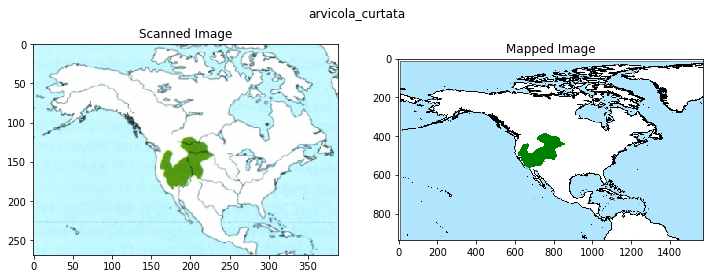

In [97]:
from pathlib import Path
import glob

# Initialize world map
world_map_img = get_world_map()

if world_map_img is None:
    exit(0)
    
# Create list of image files to register and list of species region masks
path_maps = Path(IMAGES_TO_REGISTER_FOLDER)
print("Path to maps : " + str(path_maps))

path_masks = Path(IMAGES_TO_REGISTER_SPECIES_MASKS_FOLDER)
print("Path to masks : " + str(path_masks))

# Create list of scanned image and species mask filepaths  
scanned_images_filepaths = [file_path for file_path in path_maps.glob('**/*.jpg')]
species_masks_filepaths = [file_path for file_path in path_masks.glob('**/*.jpg')]

# Sort the image filenames in alphabetical order
scanned_images_filepaths = sorted(scanned_images_filepaths)
species_masks_filepaths = sorted(species_masks_filepaths)

# Check if the number of images to register is same as number of species mask images
assert len(scanned_images_filepaths) == len(species_masks_filepaths)

print("Number of scanned images to process: " + str(len(scanned_images_filepaths)))

# Loop over all the images and species masks and execute the pipeline
for index in range(0, len(scanned_images_filepaths)):
    
    scanned_image_filepath = scanned_images_filepaths[index]
    species_mask_filepath = species_masks_filepaths[index]
    
    # Extract the filenames of scanned image and species mask
    scanned_image_filepath_split_list = str(scanned_image_filepath).split("\\")
    scanned_image_filename_prefix = scanned_image_filepath_split_list[-1].split(".")[0]
  
    species_mask_filepath_split_list = str(species_mask_filepath).split("\\")
    species_mask_filename_prefix = species_mask_filepath_split_list[-1].split(".")[0]
    
    print("Processing " + scanned_image_filename_prefix + " & " + species_mask_filename_prefix)

    # Update current image prefix
    current_image_prefix = scanned_image_filename_prefix
    
    register(scanned_images_filepaths[index], species_masks_filepaths[index], world_map_img)


The following code snippet calls combine_shapefiles function which combines the dumped shapefiles into a single shapefile

In [98]:
if COMBINE_SHAPEFILES:
    combine_shapefiles(RESULTS_FOLDER, RESULTS_FOLDER, "combined")

## Conclusion

In this sample notebook, we automated the process of mapping species region distribution on the world map. We defined functions for each step in the workflow and executed the steps (functions) using a driver function. This sample can be a starting point for developers to perform similar registration tasks by tuning the parameters. The use-case of registering satellite images on the world can also be accomplished using a similar workflow with few changes in the feature detection and matching steps.   